use same datasat but use KNN instead logis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('original.csv')

In [3]:
df.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [9]:
df.drop(df[df['age']<0].index,axis=0,inplace=True)

In [10]:
df['age'].fillna(df['age'].mean(),inplace=True)

<AxesSubplot:>

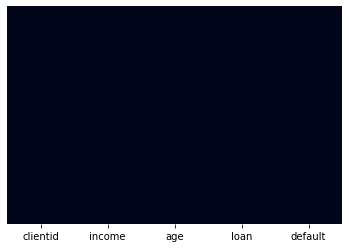

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop(['default'],axis=1))
scaler_tran = scaler.transform(df.drop(['default'],axis=1))

In [14]:
df_scale = pd.DataFrame(data=scaler_tran,columns=df.drop(['default'],axis=1).columns)
df_scale.head()

,clientid,income,age,loan
0,-1.736184,1.454117,1.364356,1.203524
1,-1.734449,-0.761739,0.542252,0.697145
2,-1.732715,0.837074,1.672915,1.175417
3,-1.730980,-0.182700,0.363862,0.545703
4,-1.729246,1.509740,-1.685210,1.421463


In [15]:
from sklearn.model_selection import train_test_split
X = df_scale.drop('clientid',axis=1)
y = df['default']
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.3)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train,y_train)
y_knn = knn.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_knn))
print(classification_report(y_test,y_knn))

[[513   9]
 [  7  71]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       522
           1       0.89      0.91      0.90        78

    accuracy                           0.97       600
   macro avg       0.94      0.95      0.94       600
weighted avg       0.97      0.97      0.97       600



In [ ]:
# knn model ทำนาย dataset ชุดนี้ได้ดีกว่า logis model 

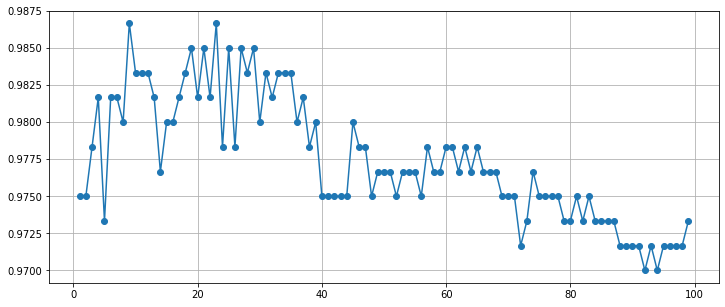

In [20]:
list = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    list.append(np.average(pred_i == y_test))

plt.figure(figsize=(12,5))
plt.plot(range(1,100),list,marker='o')
plt.grid()
#ค่าความแม่นของ model อยู่ในช่วง 97 - 98% ขึ้นอยู่กับ n_neighbors